# Analysis

In [16]:
import os
import anndata as ad
import scipy as sp
import pickle
import pandas as pd
import igraph as ig
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [17]:
"""
The data folder is structured as follows:

data
    |input
        |original
        |pb
        |pb_L
    |output
        |corr
        |gk
        |corr_L
        |graph_sum
        |extra
        |graph
        |plots
"""

data = os.path.abspath(os.path.join(os.getcwd(),"../data"))

input = os.path.join(data, "input")
output = os.path.join(data, "output")

original = os.path.join(input, "original")
pb = os.path.join(input, "pb")
pb_L = os.path.join(input, "pb_L")

corr = os.path.join(output, "corr")
gk = os.path.join(output, "gk")
corr_L = gk = os.path.join(output, "corr_L")
graph_sum = os.path.join(output, "graph_sum")
extra = os.path.join(output, "extra")
graph = os.path.join(output, "graph")
plots = os.path.join(output, "plots")

In [18]:
# Read Original Data
adt = ad.read_h5ad(os.path.join(original, "adt_pp.h5ad"))
bulkRNA = ad.read_h5ad(os.path.join(original, "bulkRNA_pp.h5ad"))
cytof = ad.read_h5ad (os.path.join(original, "cytof_pp.h5ad"))
facs = ad.read_h5ad(os.path.join(original, "facs_pp.h5ad"))
luminex = ad.read_h5ad(os.path.join(original, "luminex_pp.h5ad"))
scRNA = ad.read_h5ad(os.path.join(original, "scRNA_pp.h5ad"))

# Read Pseudobulks
with open(os.path.join(pb_L, "citeRNA_pseudobulks.pickle"), "rb") as f:
    citeRNA_pseudobulks = pickle.load(f) # Float

with open(os.path.join(pb_L, "adt_pseudobulks.pickle"), "rb") as f:
    adt_pseudobulks = pickle.load(f) # Float

with open(os.path.join(pb_L, "cytof_pseudobulks.pickle"), "rb") as f:
    cytof_pseudobulks = pickle.load(f) # Float

with open(os.path.join(pb_L, "bulkRNA_pseudobulks.pickle"), "rb") as f:
    bulkRNA_pseudobulks = pickle.load(f) # Float

luminex_pseudobulks = pd.read_csv(os.path.join(pb_L, "luminex_pseudobulks.csv"), index_col = 0) # Float
facs_pseudobulks = pd.read_csv(os.path.join(pb_L, "facs_pseudobulks.csv"), index_col = 0)


# Correlations
with open(os.path.join(corr_L,'citeRNA_disease_clusters_corr.pickle'), 'rb') as f:
    citeRNA_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L,'corr_p_citeRNA.pickle'), 'rb') as f:
    corr_p_citeRNA = pickle.load(f)

with open(os.path.join(corr_L,'adt_disease_clusters_corr.pickle'), 'rb') as f:
    adt_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L,'corr_p_adt.pickle'), 'rb') as f:
    corr_p_adt = pickle.load(f)

with open(os.path.join(corr_L, 'cytof_disease_clusters_corr.pickle'), 'rb') as f:
    cytof_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_cytof.pickle'), 'rb') as f:
    corr_p_cytof = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_d_cytof.pickle'), 'rb') as f:
    corr_p_d_cytof = pickle.load(f)

with open(os.path.join(corr_L, 'bulkRNA_disease_clusters_corr.pickle'), 'rb') as f:
    bulkRNA_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_bulkRNA.pickle'), 'rb') as f:
    corr_p_bulkRNA = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_luminex.pickle'), 'rb') as f:
    corr_p_luminex = pickle.load(f)

with open(os.path.join(corr_L, 'luminex_disease_clusters_corr.pickle'), 'rb') as f:
    luminex_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_facs.pickle'), 'rb') as f:
    corr_p_facs = pickle.load(f)

with open(os.path.join(corr_L, 'facs_disease_clusters_corr.pickle'), 'rb') as f:
    facs_disease_clusters_corr = pickle.load(f)

corr_d_luminex = pd.read_csv(os.path.join(corr_L, "corr_d_luminex.csv"), index_col = 0) 
corr_d_facs = pd.read_csv(os.path.join(corr_L, "corr_d_facs.csv"), index_col = 0)
corr_p_d_facs = pd.read_csv(os.path.join(corr_L, "corr_p_d_facs.csv"), index_col = 0)
corr_p_d_luminex = pd.read_csv(os.path.join(corr_L, "corr_p_d_luminex.csv"), index_col = 0)

/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation

## Preprocessing
Focusing only on the 75 shared patients while omitting noise.

In [19]:
# core Patients
shared_patients = set(adt.obs["COMBAT_ID"]).intersection(set(bulkRNA.obs["COMBAT_ID"])).intersection(set(cytof.obs["COMBAT_ID"])).intersection(set(facs.obs["COMBAT_ID"])).intersection(set(luminex.obs["COMBAT_ID"])).intersection(set(scRNA.obs["COMBAT_ID"]))

In [20]:
samples = [sample for sample in luminex_pseudobulks.index if sample.split("-")[0] in shared_patients]
luminex_pseudobulks = luminex_pseudobulks.loc[samples]

samples = [sample for sample in facs_pseudobulks.index if sample.split("-")[0] in shared_patients]
facs_pseudobulks = facs_pseudobulks.loc[samples]

modalities = {"bulkRNA": bulkRNA_pseudobulks, "citeRNA": citeRNA_pseudobulks, "adt": adt_pseudobulks, "cytof": cytof_pseudobulks}

for modality_name in modalities.keys():
    modality = modalities[modality_name]
    networks = {}
    for network_name in modality.keys():
        if not (str(network_name).find("nan") > -1 or str(network_name).find("NaN") > -1 or (str(network_name).find("grey") > -1 and str(network_name).find("grey60") == -1)):
            network = modality[network_name]
            samples = [sample for sample in network.index if sample.split("-")[0] in shared_patients]
            network = network.loc[samples]
            networks[network_name] = network
    
    modalities[modality_name] = networks

bulkRNA_pseudobulks = modalities["bulkRNA"]
citeRNA_pseudobulks = modalities["citeRNA"]
adt_pseudobulks = modalities["adt"]
cytof_pseudobulks = modalities["cytof"]

In [21]:
modalities = {"bulkRNA": bulkRNA, "citeRNA": scRNA, "adt": adt, "cytof": cytof, "luminex": luminex, "facs":facs}
patient_disease_map = {} # map shared patients to diseases
disease_counts = {"COVID_MILD":[], "HV": [], "COVID_SEV":[], "COVID_CONV":[], "COVID_HCW":[], "COVID_CRIT":[], "Sepsis":[]}

for p in shared_patients:
    disease = cytof.obs.Diseases[cytof.obs.COMBAT_ID == p][0]
    disease_counts[disease].append(p)

    for modality_name in modalities.keys():
        modality = modalities[modality_name]
        samples = set(modality.obs.PID[modality.obs.COMBAT_ID == p])
        for sample in samples:
            patient_disease_map[sample] =  disease

In [22]:
for key in disease_counts.keys():
    print(key, len(disease_counts[key]))

COVID_MILD 11
HV 7
COVID_SEV 20
COVID_CONV 7
COVID_HCW 1
COVID_CRIT 13
Sepsis 16


## KNN

In [23]:
minmax_scale = MinMaxScaler(feature_range=(0, 1)) # For rescaling each feature to the [0,1] interval so that they are all comparable 

In [24]:
luminex_X = minmax_scale.fit_transform(np.array(luminex_pseudobulks))
facs_X = minmax_scale.fit_transform(np.array(facs_pseudobulks))
bulkRNA_X = {key:minmax_scale.fit_transform(np.array(bulkRNA_pseudobulks[key])) for key in bulkRNA_pseudobulks.keys()}
citeRNA_X = {key:minmax_scale.fit_transform(np.array(citeRNA_pseudobulks[key])) for key in citeRNA_pseudobulks.keys()}
adt_X = {key:minmax_scale.fit_transform(np.array(adt_pseudobulks[key])) for key in adt_pseudobulks.keys()}
cytof_X = {key:minmax_scale.fit_transform(np.array(cytof_pseudobulks[key])) for key in cytof_pseudobulks.keys()}


### K = 10

In [25]:
nbrs_10_luminex = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(luminex_X)
samples = []
p_diseases = []

edges = [] # Remove self-loops and maintain the order of patients
distances, indices = nbrs_10_luminex.kneighbors(luminex_X)
for i, source in enumerate(indices):
    samples.append(luminex_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[luminex_pseudobulks.index[i]])
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = luminex_X.shape[0]
g_10_luminex = ig.Graph(n_vertices, edges)
g_10_luminex.vs["PID"] = samples
g_10_luminex.vs["Diseases"] = p_diseases

In [26]:
nbrs_10_facs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(facs_X)
samples = []
p_diseases = []

edges = []
distances, indices = nbrs_10_facs.kneighbors(facs_X)
for i, source in enumerate(indices):
    samples.append(facs_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[facs_pseudobulks.index[i]])
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = facs_X.shape[0]
g_10_facs = ig.Graph(n_vertices, edges)
g_10_facs.vs["PID"] = samples
g_10_facs.vs["Diseases"] = p_diseases

In [27]:
g_10_bulkRNA = {}

for key in bulkRNA_X.keys():
    nbrs_10_bulkRNA = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(bulkRNA_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_10_bulkRNA.kneighbors(bulkRNA_X[key])
    for i, source in enumerate(indices):
        samples.append(bulkRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[bulkRNA_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = bulkRNA_X[key].shape[0]
    g_10_bulkRNA[key] = ig.Graph(n_vertices, edges)
    g_10_bulkRNA[key].vs["PID"] = samples
    g_10_bulkRNA[key].vs["Diseases"] = p_diseases

In [28]:
g_10_citeRNA = {}

for key in citeRNA_X.keys():
    nbrs_10_citeRNA = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(citeRNA_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_10_citeRNA.kneighbors(citeRNA_X[key])
    for i, source in enumerate(indices):
        samples.append(citeRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[citeRNA_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = citeRNA_X[key].shape[0]
    g_10_citeRNA[key] = ig.Graph(n_vertices, edges)
    g_10_citeRNA[key].vs["PID"] = samples
    g_10_citeRNA[key].vs["Diseases"] = p_diseases

In [29]:
g_10_adt = {}

for key in adt_X.keys():
    nbrs_10_adt = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(adt_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_10_adt.kneighbors(adt_X[key])
    for i, source in enumerate(indices):
        samples.append(adt_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[adt_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = adt_X[key].shape[0]
    g_10_adt[key] = ig.Graph(n_vertices, edges)
    g_10_adt[key].vs["PID"] = samples
    g_10_adt[key].vs["Diseases"] = p_diseases

In [30]:
g_10_cytof = {}

for key in cytof_X.keys():
    nbrs_10_cytof = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(cytof_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_10_cytof.kneighbors(cytof_X[key])
    for i, source in enumerate(indices):
        samples.append(cytof_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[cytof_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = cytof_X[key].shape[0]
    g_10_cytof[key] = ig.Graph(n_vertices, edges)
    g_10_cytof[key].vs["PID"] = samples
    g_10_cytof[key].vs["Diseases"] = p_diseases

### K = 5

In [31]:
nbrs_5_luminex = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(luminex_X)
samples = []
p_diseases = []

edges = [] # Remove self-loops and maintain the order of patients
distances, indices = nbrs_5_luminex.kneighbors(luminex_X)
for i, source in enumerate(indices):
    samples.append(luminex_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[luminex_pseudobulks.index[i]])
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = luminex_X.shape[0]
g_5_luminex = ig.Graph(n_vertices, edges)
g_5_luminex.vs["PID"] = samples
g_5_luminex.vs["Diseases"] = p_diseases

In [32]:
nbrs_5_facs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(facs_X)
samples = []
p_diseases = []

edges = []
distances, indices = nbrs_5_facs.kneighbors(facs_X)
for i, source in enumerate(indices):
    samples.append(facs_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[facs_pseudobulks.index[i]])
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = facs_X.shape[0]
g_5_facs = ig.Graph(n_vertices, edges)
g_5_facs.vs["PID"] = samples
g_5_facs.vs["Diseases"] = p_diseases

In [33]:
g_5_bulkRNA = {}

for key in bulkRNA_X.keys():
    nbrs_5_bulkRNA = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(bulkRNA_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_5_bulkRNA.kneighbors(bulkRNA_X[key])
    for i, source in enumerate(indices):
        samples.append(bulkRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[bulkRNA_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = bulkRNA_X[key].shape[0]
    g_5_bulkRNA[key] = ig.Graph(n_vertices, edges)
    g_5_bulkRNA[key].vs["PID"] = samples
    g_5_bulkRNA[key].vs["Diseases"] = p_diseases

In [34]:
g_5_citeRNA = {}

for key in citeRNA_X.keys():
    nbrs_5_citeRNA = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(citeRNA_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_5_citeRNA.kneighbors(citeRNA_X[key])
    for i, source in enumerate(indices):
        samples.append(citeRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[citeRNA_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = citeRNA_X[key].shape[0]
    g_5_citeRNA[key] = ig.Graph(n_vertices, edges)
    g_5_citeRNA[key].vs["PID"] = samples
    g_5_citeRNA[key].vs["Diseases"] = p_diseases

In [35]:
g_5_adt = {}

for key in adt_X.keys():
    nbrs_5_adt = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(adt_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_5_adt.kneighbors(adt_X[key])
    for i, source in enumerate(indices):
        samples.append(adt_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[adt_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = adt_X[key].shape[0]
    g_5_adt[key] = ig.Graph(n_vertices, edges)
    g_5_adt[key].vs["PID"] = samples
    g_5_adt[key].vs["Diseases"] = p_diseases

In [36]:
g_5_cytof = {}

for key in cytof_X.keys():
    nbrs_5_cytof = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(cytof_X[key])
    edges = []
    samples = []
    p_diseases = []
    distances, indices = nbrs_5_cytof.kneighbors(cytof_X[key])
    for i, source in enumerate(indices):
        samples.append(cytof_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[cytof_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = cytof_X[key].shape[0]
    g_5_cytof[key] = ig.Graph(n_vertices, edges)
    g_5_cytof[key].vs["PID"] = samples
    g_5_cytof[key].vs["Diseases"] = p_diseases

### K = 2

In [37]:
nbrs_2_luminex = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(luminex_X)

edges = [] # Remove self-loops and maintain the order of patients
distances, indices = nbrs_2_luminex.kneighbors(luminex_X)
for i, source in enumerate(indices):
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = luminex_X.shape[0]
g_2_luminex = ig.Graph(n_vertices, edges)

In [38]:
nbrs_2_facs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(facs_X)

edges = []
distances, indices = nbrs_2_facs.kneighbors(facs_X)
for i, source in enumerate(indices):
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = facs_X.shape[0]
g_2_facs = ig.Graph(n_vertices, edges)

In [39]:
g_2_bulkRNA = {}

for key in bulkRNA_X.keys():
    nbrs_2_bulkRNA = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(bulkRNA_X[key])
    edges = []
    distances, indices = nbrs_2_bulkRNA.kneighbors(bulkRNA_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = bulkRNA_X[key].shape[0]
    g_2_bulkRNA[key] = ig.Graph(n_vertices, edges)


In [40]:
g_2_citeRNA = {}

for key in citeRNA_X.keys():
    nbrs_2_citeRNA = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(citeRNA_X[key])
    edges = []
    distances, indices = nbrs_2_citeRNA.kneighbors(citeRNA_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = citeRNA_X[key].shape[0]
    g_2_citeRNA[key] = ig.Graph(n_vertices, edges)

In [41]:
g_2_adt = {}

for key in adt_X.keys():
    nbrs_2_adt = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(adt_X[key])
    edges = []
    distances, indices = nbrs_2_adt.kneighbors(adt_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = adt_X[key].shape[0]
    g_2_adt[key] = ig.Graph(n_vertices, edges)

In [42]:
g_2_cytof = {}

for key in cytof_X.keys():
    nbrs_2_cytof = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(cytof_X[key])
    edges = []
    distances, indices = nbrs_2_cytof.kneighbors(cytof_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = cytof_X[key].shape[0]
    g_2_cytof[key] = ig.Graph(n_vertices, edges)

### All

In [43]:
adt_g = {"10":g_10_adt, "5": g_5_adt, "2": g_2_adt }
cytof_g = {"10":g_10_cytof, "5": g_5_cytof, "2": g_2_cytof }
citeRNA_g = {"10":g_10_citeRNA, "5": g_5_citeRNA, "2": g_2_citeRNA }
bulkRNA_g = {"10":g_10_bulkRNA, "5": g_5_bulkRNA, "2": g_2_bulkRNA }
luminex_g = {"10":g_10_luminex, "5": g_5_luminex, "2": g_2_luminex }
facs_g = {"10":g_10_facs, "5": g_5_facs, "2": g_2_facs }

## Communities with KNNs
Computes and visualizes communities for 10-NN and 2-NN

In [44]:
def community_comp(g):
    communities = g.community_edge_betweenness()
    communities = communities.as_clustering()

    num_communities = len(communities)
    palette = ig.RainbowPalette(n=num_communities)
    for i, community in enumerate(communities):
        g.vs["community"] = community
        g.vs[community]["color"] = i
        community_edges = g.es.select(_within=community)
        community_edges["color"] = i
    return communities, palette

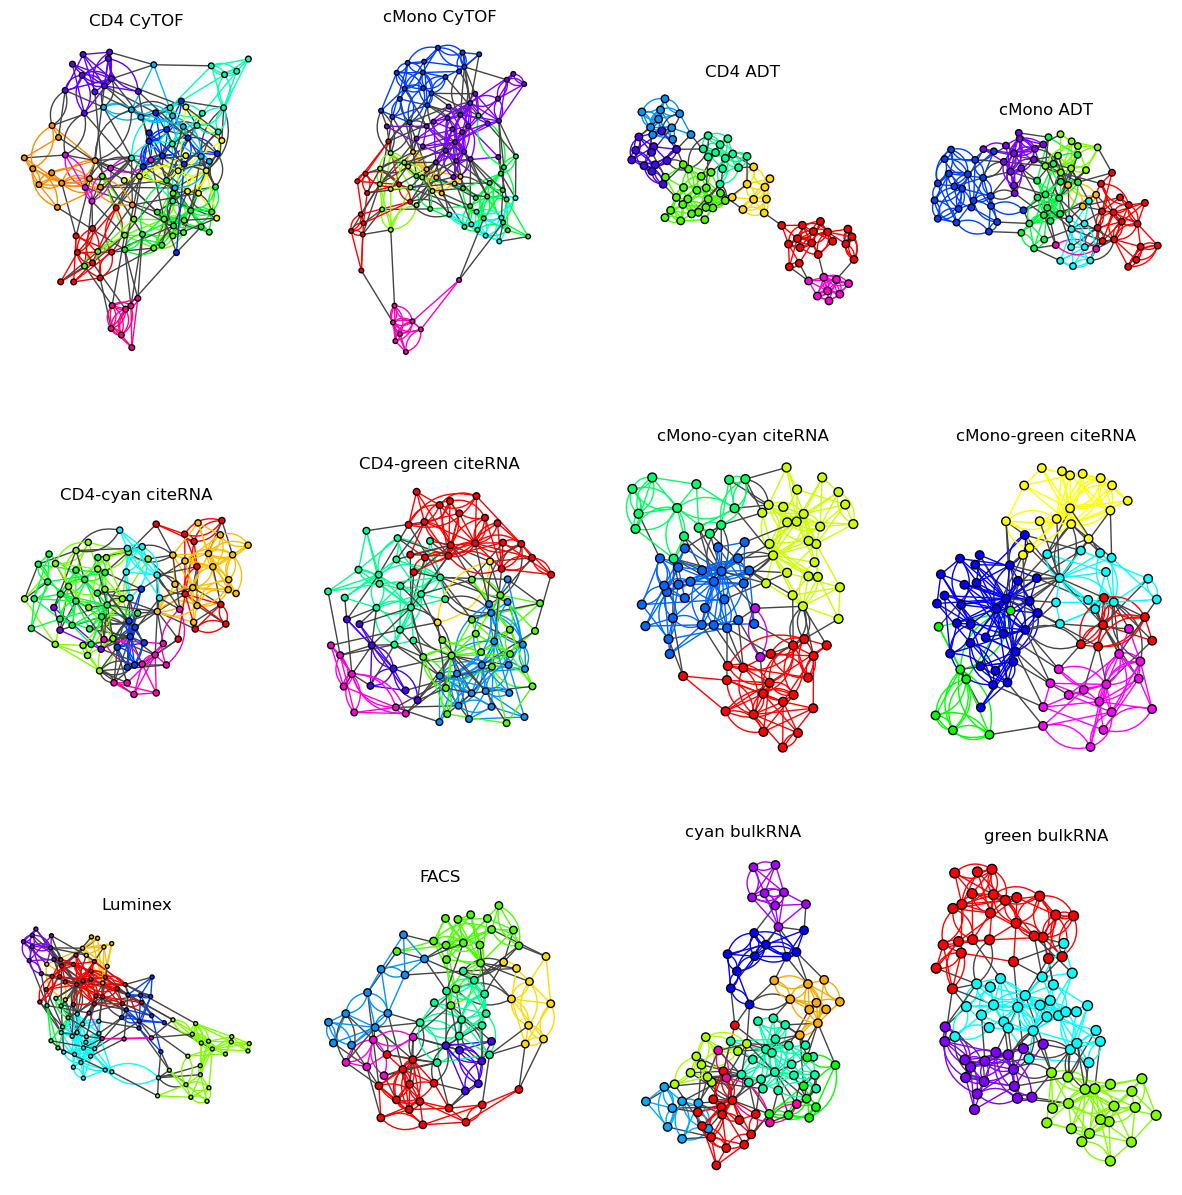

In [45]:
fig, ax = plt.subplots(3,4,figsize=(15,15))

c, palette = community_comp(g_5_cytof["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,0],
    vertex_size=0.3,
)
ax[0,0].set_title("CD4 CyTOF")


c, palette = community_comp(g_5_cytof["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,1],
    vertex_size=0.3,
)
ax[0,1].set_title("cMono CyTOF")

c, palette = community_comp(g_5_adt["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,2],
    vertex_size=0.3,
)
ax[0,2].set_title("CD4 ADT")


c, palette = community_comp(g_5_adt["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,3],
    vertex_size=0.3,
)
ax[0,3].set_title("cMono ADT")

c, palette = community_comp(g_5_citeRNA["CD4-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,0],
    vertex_size=0.3,
)
ax[1,0].set_title("CD4-cyan citeRNA")


c, palette = community_comp(g_5_citeRNA["CD4-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,1],
    vertex_size=0.3,
)
ax[1,1].set_title("CD4-green citeRNA")

c, palette = community_comp(g_5_citeRNA["cMono-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,2],
    vertex_size=0.3,
)
ax[1,2].set_title("cMono-cyan citeRNA")


c, palette = community_comp(g_5_citeRNA["cMono-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,3],
    vertex_size=0.3,
)
ax[1,3].set_title("cMono-green citeRNA")

c, palette = community_comp(g_5_luminex)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,0],
    vertex_size=0.3,
)
ax[2,0].set_title("Luminex")


c, palette = community_comp(g_5_facs)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,1],
    vertex_size=0.3,
)
ax[2,1].set_title("FACS")

c, palette = community_comp(g_5_bulkRNA["cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,2],
    vertex_size=0.3,
)
ax[2,2].set_title("cyan bulkRNA")


c, palette = community_comp(g_5_bulkRNA["green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,3],
    vertex_size=0.3,
)
ax[2,3].set_title("green bulkRNA")

plt.show()

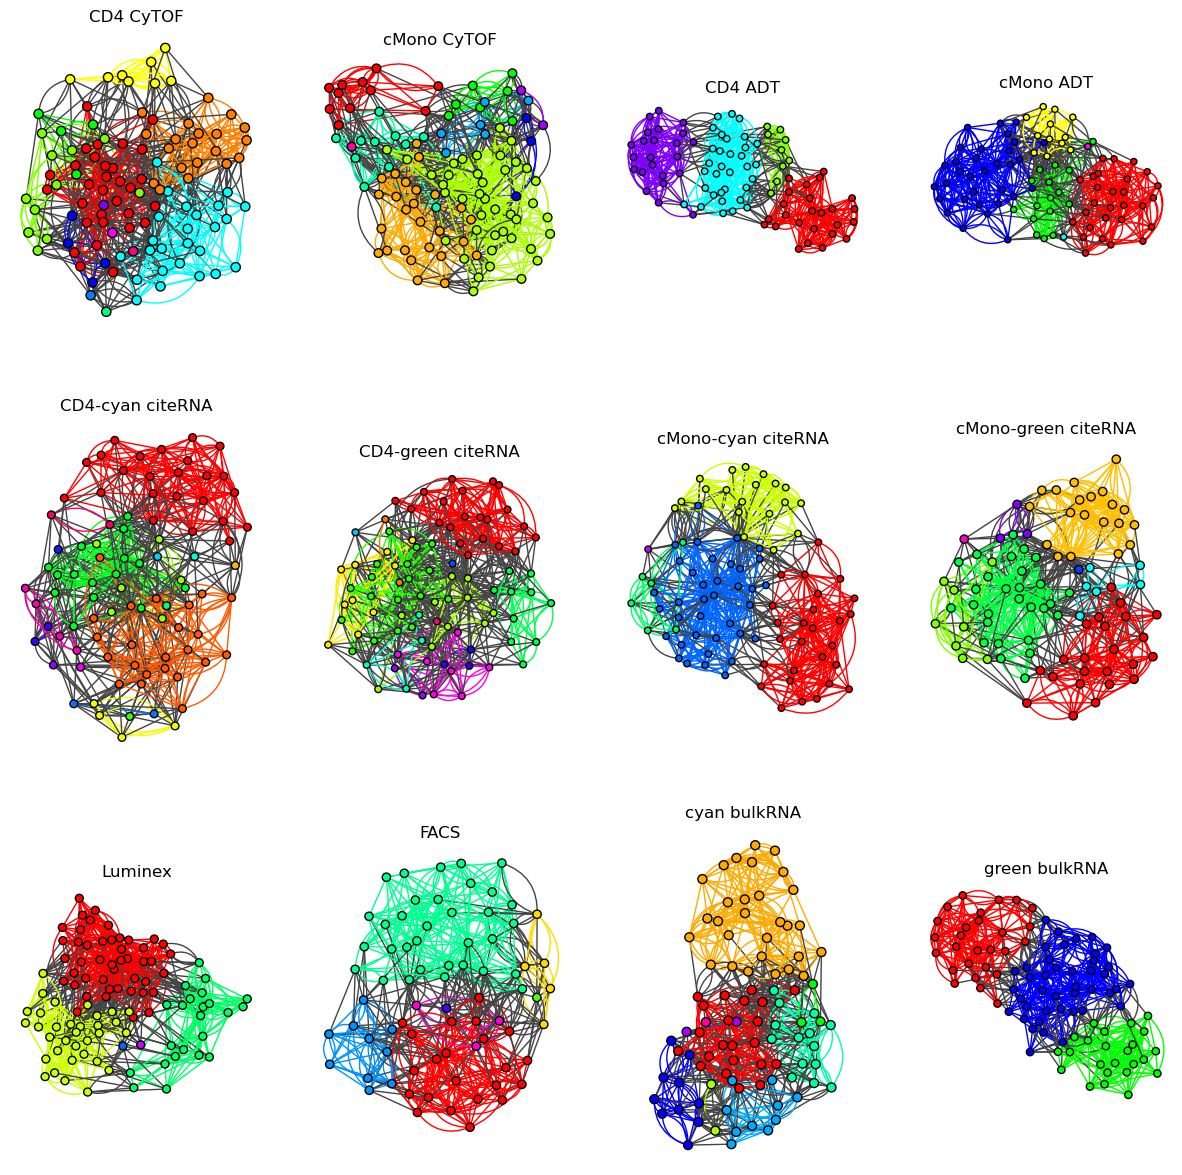

In [46]:
fig, ax = plt.subplots(3,4,figsize=(15,15))

c, palette = community_comp(g_10_cytof["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,0],
    vertex_size=0.3,
)
ax[0,0].set_title("CD4 CyTOF")


c, palette = community_comp(g_10_cytof["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,1],
    vertex_size=0.3,
)
ax[0,1].set_title("cMono CyTOF")

c, palette = community_comp(g_10_adt["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,2],
    vertex_size=0.3,
)
ax[0,2].set_title("CD4 ADT")


c, palette = community_comp(g_10_adt["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,3],
    vertex_size=0.3,
)
ax[0,3].set_title("cMono ADT")

c, palette= community_comp(g_10_citeRNA["CD4-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,0],
    vertex_size=0.3,
)
ax[1,0].set_title("CD4-cyan citeRNA")


c, palette = community_comp(g_10_citeRNA["CD4-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,1],
    vertex_size=0.3,
)
ax[1,1].set_title("CD4-green citeRNA")

c, palette = community_comp(g_10_citeRNA["cMono-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,2],
    vertex_size=0.3,
)
ax[1,2].set_title("cMono-cyan citeRNA")


c, palette = community_comp(g_10_citeRNA["cMono-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,3],
    vertex_size=0.3,
)
ax[1,3].set_title("cMono-green citeRNA")

c, palette = community_comp(g_10_luminex)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,0],
    vertex_size=0.3,
)
ax[2,0].set_title("Luminex")


c, palette = community_comp(g_10_facs)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,1],
    vertex_size=0.3,
)
ax[2,1].set_title("FACS")

c, palette = community_comp(g_10_bulkRNA["cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,2],
    vertex_size=0.3,
)
ax[2,2].set_title("cyan bulkRNA")


c, palette = community_comp(g_10_bulkRNA["green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,3],
    vertex_size=0.3,
)
ax[2,3].set_title("green bulkRNA")

plt.show()


In [47]:
# To ensure all communities are computed and saved as a vertex attribute
modules = [g_10_cytof, g_10_adt, g_10_bulkRNA, g_10_citeRNA]
for module in modules:
    for v in module.values():
        community_comp(v)

## Diseas Communities with KNNs
Computes and visualizes graphs based on diseaes

In [48]:
colors = ["#ff3660", # mellow pink
          "#ffc99c", # creme
          "#ffdf20", # yellow
          "#3e4ae0", # blue
          "#fe0100", # red
          "#b4b8f8", # lavender
          "#3ccaf8", # aqua
          "#8fce00", # light green
          "#822288", # purple
          "#1e7440", # dark green
          "#c90076", # magenta
          "#c9ad88", # beige
          "#ec8416", # orange
          "#8f1616", # wine red
          "#f90f98", # hot pink
          "#c8f214", # lemon green
          ]

disease_color_map = {}
for i, disease in enumerate(set(patient_disease_map.values())): # Every disease is assigned a color
    disease_color_map[str(disease)] = colors[i]
disease_color_map["extra"] = "#000000" # black

In [49]:
def disease_comp(g):
    disease_colors_v = [] # Vertex colors
    disease_colors_e = [0] * g.ecount() # Edge colors
    for i, disease in enumerate(g.vs["Diseases"]):
        disease_colors_v.append(disease_color_map[disease]) # map disease to its color, save in order of nodes in a lits
        edges = g.vs[i].incident() # for node i, get all its edges
        for e in edges: 
            e_id = g.get_eid(e.source, e.target) # obtain the edge number using its source and target. 
            if g.vs["Diseases"][e.target] == g.vs["Diseases"][e.source]: # the information that the edge connects two patients with the same disease
                disease_colors_e[e_id] = disease_color_map[disease] # store the edge color in the correct position 
                g.es[e_id]["disease_color"] = disease_color_map[disease] # save the edge color as a community information
                g.es[e_id]["status"] = "intra"
            else: 
                disease_colors_e[e_id] = disease_color_map["extra"]
                g.es[e_id]["disease_color"] = disease_color_map["extra"]
                g.es[e_id]["status"] = "inter" # the information that the edge connects two patients with differnt diseases 

    return disease_colors_v, disease_colors_e

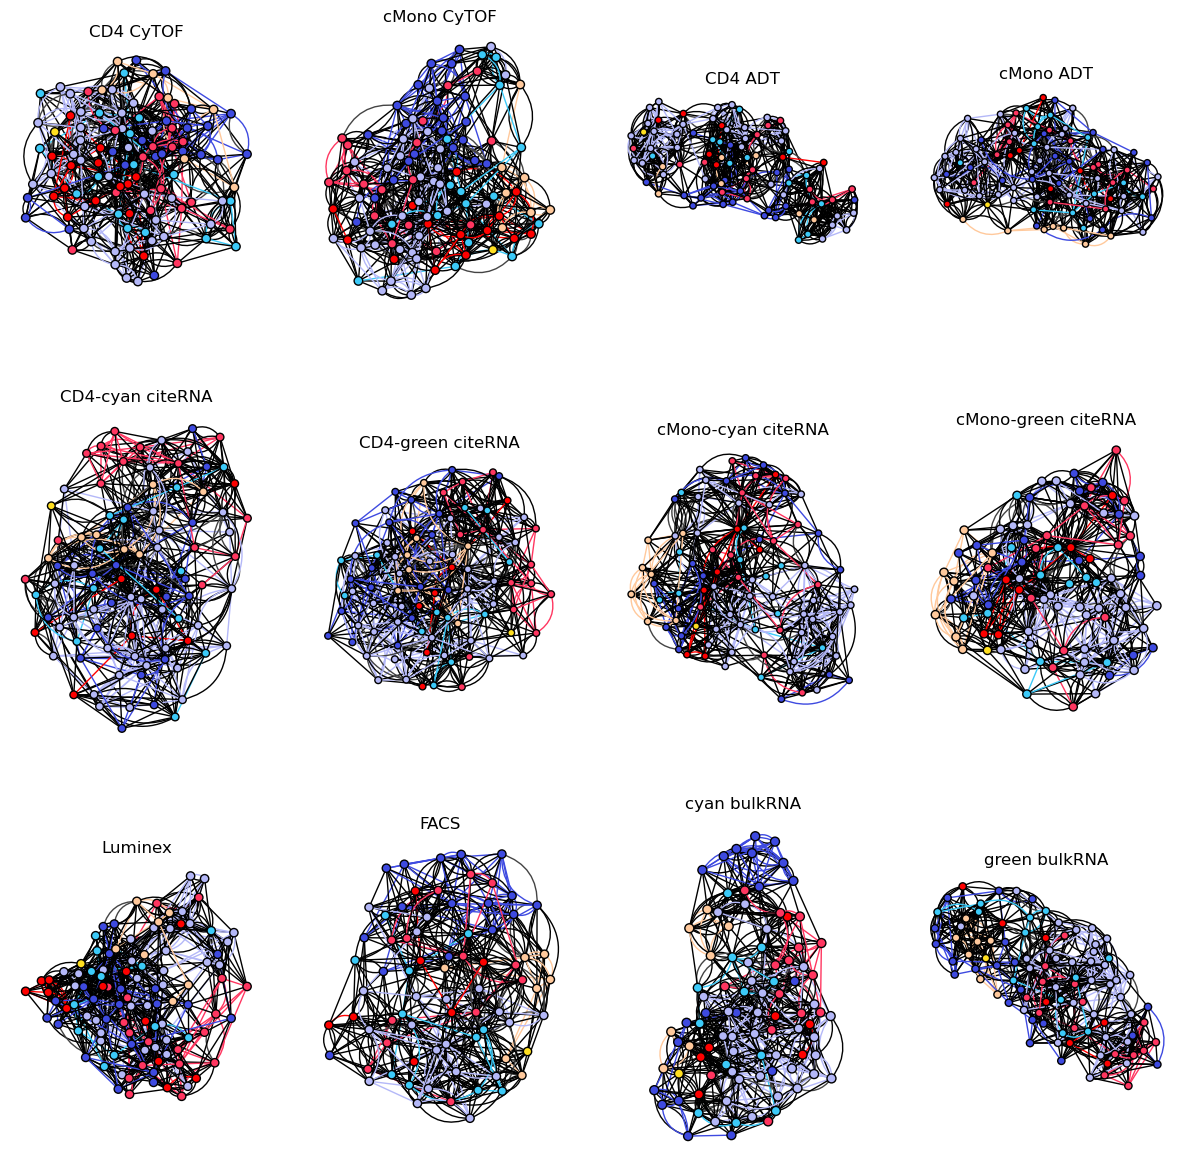

In [50]:
fig, ax = plt.subplots(3,4,figsize=(15,15))

v_c, e_c = disease_comp(g_10_cytof["CD4"])
ig.plot(
    g_10_cytof["CD4"],
    edge_width=1,
    target=ax[0,0],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,0].set_title("CD4 CyTOF")

v_c, e_c = disease_comp(g_10_cytof["cMono"])
ig.plot(
    g_10_cytof["cMono"],
    edge_width=1,
    target=ax[0,1],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,1].set_title("cMono CyTOF")

v_c, e_c = disease_comp(g_10_adt["CD4"])
ig.plot(
    g_10_adt["CD4"],
    edge_width=1,
    target=ax[0,2],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,2].set_title("CD4 ADT")

v_c, e_c = disease_comp(g_10_adt["cMono"])
ig.plot(
    g_10_adt["cMono"],
    edge_width=1,
    target=ax[0,3],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,3].set_title("cMono ADT")

v_c, e_c = disease_comp(g_10_citeRNA["CD4-cyan"])
ig.plot(
    g_10_citeRNA["CD4-cyan"],
    edge_width=1,
    target=ax[1,0],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,0].set_title("CD4-cyan citeRNA")

v_c, e_c = disease_comp(g_10_citeRNA["CD4-green"])
ig.plot(
    g_10_citeRNA["CD4-green"],
    edge_width=1,
    target=ax[1,1],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,1].set_title("CD4-green citeRNA")

v_c, e_c = disease_comp(g_10_citeRNA["cMono-cyan"])
ig.plot(
    g_10_citeRNA["cMono-cyan"],
    edge_width=1,
    target=ax[1,2],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,2].set_title("cMono-cyan citeRNA")

v_c, e_c = disease_comp(g_10_citeRNA["cMono-green"])
ig.plot(
    g_10_citeRNA["cMono-green"],
    edge_width=1,
    target=ax[1,3],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,3].set_title("cMono-green citeRNA")

v_c, e_c = disease_comp(g_10_luminex)
ig.plot(
    g_10_luminex,
    edge_width=1,
    target=ax[2,0],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,0].set_title("Luminex")

v_c, e_c = disease_comp(g_10_facs)
ig.plot(
    g_10_facs,
    edge_width=1,
    target=ax[2,1],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,1].set_title("FACS")

v_c, e_c = disease_comp(g_10_bulkRNA["cyan"])
ig.plot(
    g_10_bulkRNA["cyan"],
    edge_width=1,
    target=ax[2,2],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,2].set_title("cyan bulkRNA")

v_c, e_c = disease_comp(g_10_bulkRNA["green"])
ig.plot(
    g_10_bulkRNA["green"],
    edge_width=1,
    target=ax[2,3],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,3].set_title("green bulkRNA")

plt.show()

In [51]:
# To ensure all disease communities are computed and saved as a edge attribute
modules = [g_10_cytof, g_10_adt, g_10_bulkRNA, g_10_citeRNA] 
for module in modules:
    for v in module.values(): # graphs
        disease_comp(v)

## Edge Information Computation

In [115]:
modalities = [g_10_adt, g_10_cytof, g_10_citeRNA, g_10_bulkRNA]

for modality in modalities:
    for key in modality.keys():
        network = modality[key]
        for edge in network.es:
            s_d = network.vs[edge.source]["Diseases"]
            t_d = network.vs[edge.target]["Diseases"]
            com = network.vs[edge.source]["color"]
            if s_d == t_d:
                edge["status"] = "intra"
                edge["color"] = com
                edge["Disease"] = s_d
            else:
                edge["status"] = "inter"
                edge["color"] = None
                edge["Disease1"] = s_d
                edge["Disease2"] = t_d

In [117]:
modalities = [g_10_luminex, g_10_facs]

for network in modalities:
    for edge in network.es:
        s_d = network.vs[edge.source]["Diseases"]
        t_d = network.vs[edge.target]["Diseases"]
        com = network.vs[edge.source]["color"]
        if s_d == t_d:
            edge["status"] = "intra"
            edge["color"] = com
            edge["Disease"] = s_d
        else:
            edge["status"] = "inter"
            edge["color"] = None
            edge["Disease1"] = s_d
            edge["Disease2"] = t_d

## Disease - Community Stats
The information regarding the frequency of each disease in each community.

In [52]:
communities_facs = {}

for vertex in g_10_facs.vs:
    com = "facs_" + str(vertex["color"])
    disease = vertex["Diseases"]
    if com in communities_facs.keys():
        if disease in communities_facs[com].keys():
            communities_facs[com][disease] = communities_facs[com][disease]  + 1
        else:
            communities_facs[com][disease] = 1
    else:
        communities_facs[com] = {}
        communities_facs[com][disease] = 1

communities_facs = {"facs": communities_facs}

In [53]:
communities_luminex = {}

for vertex in g_10_luminex.vs:
    com =  str(vertex["color"])
    disease = vertex["Diseases"]
    if com in communities_luminex.keys():
        if disease in communities_luminex[com].keys():
            communities_luminex[com][disease] = communities_luminex[com][disease]  + 1
        else:
            communities_luminex[com][disease] = 1
    else:
        communities_luminex[com] = {}
        communities_luminex[com][disease] = 1

communities_luminex = {"luminex": communities_luminex}

In [54]:
communities_bulkRNA = {}

for key in g_10_bulkRNA.keys(): # Go through every network
    communities_bulkRNA["bulkRNA_" + key] = {} 
    community_info = communities_bulkRNA["bulkRNA_" + key] 
    for vertex in g_10_bulkRNA[key].vs: # Go through every vertex in the network 
        com = str(vertex["color"]) # extract community information
        disease = vertex["Diseases"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [55]:
communities_citeRNA = {}

for key in g_10_citeRNA.keys(): # Go through every network
    communities_citeRNA["citeRNA_" + key] = {} 
    community_info = communities_citeRNA["citeRNA_" + key] 
    for vertex in g_10_citeRNA[key].vs: # Go through every vertex in the network 
        com =  str(vertex["color"]) # extract community information
        disease = vertex["Diseases"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [56]:
communities_cytof = {}

for key in g_10_cytof.keys(): # Go through every network
    communities_cytof["cytof_" + key] = {} 
    community_info = communities_cytof["cytof_" + key] 
    for vertex in g_10_cytof[key].vs: # Go through every vertex in the network 
        com = str(vertex["color"]) # extract community information
        disease = vertex["Diseases"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [57]:
communities_adt = {}

for key in g_10_adt.keys(): # Go through every network
    communities_adt["adt_" + key] = {} 
    community_info = communities_adt["adt_" + key] 
    for vertex in g_10_adt[key].vs: # Go through every vertex in the network 
        com = str(vertex["color"]) # extract community information
        disease = vertex["Diseases"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [123]:
all_communities = communities_adt | communities_cytof | communities_citeRNA | communities_bulkRNA | communities_luminex | communities_facs
all_diseases = set(patient_disease_map.values())
all_communities_df = {}

for network_name in all_communities.keys():
    df_disease_info = {k:[] for k in all_diseases}
    df_community_info = []
    network = all_communities[network_name]
    for community_name in network.keys():
        df_community_info.append(community_name)
        existing_info = network[community_name]
        missing_diseases = all_diseases.difference(existing_info.keys())
        missing_info = {d:0 for d in missing_diseases}
        all_info =  missing_info | existing_info
        for k in df_disease_info.keys():
            df_disease_info[k].append(all_info[k])
        all_communities[network_name][community_name] = {k: v for k, v in sorted(all_info.items(), key=lambda item: item[1])} # sort according to values 
    all_communities_df[network_name] = pd.DataFrame(df_disease_info, index=df_community_info)
        

In [ ]:
# Distribution visualization
from matplotlib.patches import Patch
for i, network_name in enumerate(all_communities_df.keys()): 
    if i % 16 == 0:
        if i > 0: # finish and save the plot
            name = "5__" + names[0] + "___" + names[4] +  "___" + names[8] +  "___" + names[12] + "___" + names[15]

            # Get colours for current style
            colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
            # Set up handles (the bits that are drawn in the legend) and labels
            handles = []
            group_labels = list(all_diseases)
            for group_idx in range(len(group_labels)):
                # Create a simple patch that is the correct colour
                colour = colours[group_idx]
                handles.append(Patch(edgecolor=colour, facecolor=colour, fill=True))
            # Acutally create our figure legend, using the above handles and labels
            loc='lower center'
            ncol=len(group_labels)
            fig.legend(handles=handles, labels=group_labels, loc=loc, ncol=ncol)

            # create shared x and y labeling
            fig.add_subplot(111, frameon=False)
            # hide tick and tick label of the big axes
            plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
            plt.grid(False)
            plt.xlabel("Community ID")
            plt.ylabel("Count")
            fig.suptitle("Disease Distribution in Communities Obtained from the 10-NN Graph Version")
            fig.savefig(os.path.join(plots, name)) # save the old plot

        fig, ax = plt.subplots(4,4, figsize=(20,20)) 
        names = []
        row = 0
        col = 0
    
    names.append(network_name)
    network = all_communities_df[network_name]
    network.plot(kind='bar', stacked=True, ax=ax[row,col], legend = False )
    ax[row, col].set_title(network_name)

    col+=1
    if col == 4:
        col = 0
        row+=1

In [60]:
all_networks_scores = {}
all_networks_diseases_explained = {key: [] for key in all_communities_df.keys()}

for network_name in all_communities_df.keys():
    network = all_communities_df[network_name]
    count = 0
    for i in range(len(network.index)):
        threshhold = round(sum(network.iloc[i]) / 2, 0) - 1 # the representer has to capture at least 50% of the patients in that community
        if any(network.iloc[i] > threshhold):
            count+=1
            j = np.where(network.iloc[i] > threshhold)[0]
            disease = network.columns[j] # the community representative
            all_networks_diseases_explained[network_name].append(disease)
    count = count / len(network.index) * 100
    all_networks_scores[network_name] = count

all_networks_scores = {k: v for k, v in sorted(all_networks_scores.items(), key=lambda item: item[1])} # sort according to values 

In [ ]:
# Score visualization
data = pd.DataFrame({"prct_representative_communities":list(all_networks_scores.values()), "networks" :list(all_networks_scores.keys()) })

sb.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 80))

sb.barplot(data, y = "networks", x = "prct_representative_communities", label="Score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Network Scores based on the Number of Meaningful Communities Compared to Extraxted Communities per Network")
sb.despine(left=True, bottom=True)

In [118]:
g_10_luminex.es[0]

igraph.Edge(<igraph.Graph object at 0x7ff79b74df40>, 0, {'color': None, 'disease_color': None, 'status': 'inter', 'Disease': None, 'Disease1': 'COVID_CRIT', 'Disease2': 'COVID_SEV'})

In [133]:
all_networks = {"luminex": g_10_luminex, "facs": g_10_facs }
modalities = {"adt": g_10_adt, "citeRNA": g_10_citeRNA, "bulkRNA": g_10_bulkRNA, "cytof": g_10_cytof}

for modality_name in modalities.keys():
    modality = modalities[modality_name]
    for key in modality.keys():
        network = modality[key]
        all_networks[modality_name + "_" + key] = network

In [152]:
all_communities_edge_info = {network:{disease: 0 for disease in disease_counts.keys()} for network in all_networks}
all_communities_edge_df = {}

for network_name in all_networks.keys():
    network = all_networks[network_name]
    diseases_df = []
    for disease in disease_counts.keys():
        inter = 0
        intra = 0
        for edge in network.es:
            if edge["status"] == "inter":
                if edge["Disease1"] == disease or edge["Disease2"] == disease:
                    inter += 1
            else:
                if edge["Disease"] == disease :
                    intra += 1
        all_communities_edge_info[network_name][disease] = {"inter": inter, "intra": intra, "intra_vs._all": 0 if (inter == 0 and intra == 0) else intra/ (inter+intra), "ratio": 0 if inter == 0 else intra/ inter }
        diseases_df.append(all_communities_edge_info[network_name][disease]["intra_vs._all"])
    all_communities_edge_df[network_name] = diseases_df

edge_inf_df = pd.DataFrame(all_communities_edge_df, index = list(disease_counts.keys()))

edge_inf_df.to_excel("intra_disease_edges_vs._all_edges_of_a_certain disease.xlsx")

In [146]:
all_communities_edge_info

{'luminex': {'COVID_MILD': {'inter': 178,
   'intra': 16,
   'intra_vs._all': 0.08247422680412371,
   'ratio': 0.0898876404494382},
  'HV': {'inter': 88,
   'intra': 8,
   'intra_vs._all': 0.08333333333333333,
   'ratio': 0.09090909090909091},
  'COVID_SEV': {'inter': 396,
   'intra': 135,
   'intra_vs._all': 0.2542372881355932,
   'ratio': 0.3409090909090909},
  'COVID_CONV': {'inter': 193,
   'intra': 20,
   'intra_vs._all': 0.09389671361502347,
   'ratio': 0.10362694300518134},
  'COVID_HCW': {'inter': 18, 'intra': 0, 'intra_vs._all': 0.0, 'ratio': 0.0},
  'COVID_CRIT': {'inter': 252,
   'intra': 46,
   'intra_vs._all': 0.15436241610738255,
   'ratio': 0.18253968253968253},
  'Sepsis': {'inter': 219,
   'intra': 39,
   'intra_vs._all': 0.1511627906976744,
   'ratio': 0.1780821917808219}},
 'facs': {'COVID_MILD': {'inter': 183,
   'intra': 14,
   'intra_vs._all': 0.07106598984771574,
   'ratio': 0.07650273224043716},
  'HV': {'inter': 81,
   'intra': 15,
   'intra_vs._all': 0.15625,


In [141]:
all_communities_edge_info

{'luminex': {'COVID_MILD': {'inter': 178,
   'intra': 16,
   'intra_vs._all': 0.08247422680412371,
   'ratio': 0.0898876404494382},
  'HV': {'inter': 88,
   'intra': 8,
   'intra_vs._all': 0.08333333333333333,
   'ratio': 0.09090909090909091},
  'COVID_SEV': {'inter': 396,
   'intra': 135,
   'intra_vs._all': 0.2542372881355932,
   'ratio': 0.3409090909090909},
  'COVID_CONV': {'inter': 193,
   'intra': 20,
   'intra_vs._all': 0.09389671361502347,
   'ratio': 0.10362694300518134},
  'COVID_HCW': {'inter': 18, 'intra': 0, 'intra_vs._all': 0.0, 'ratio': 0.0},
  'COVID_CRIT': {'inter': 252,
   'intra': 46,
   'intra_vs._all': 0.15436241610738255,
   'ratio': 0.18253968253968253},
  'Sepsis': {'inter': 219,
   'intra': 39,
   'intra_vs._all': 0.1511627906976744,
   'ratio': 0.1780821917808219}},
 'facs': {'COVID_MILD': {'inter': 183,
   'intra': 14,
   'intra_vs._all': 0.07106598984771574,
   'ratio': 0.07650273224043716},
  'HV': {'inter': 81,
   'intra': 15,
   'intra_vs._all': 0.15625,


## Inspection of the Covid Family

## Network-Disease Importance Based on Correlation
For every disease pair, go through every network, compute the average correlation, sort from lowest score to highest score. 
This will result in 460 scores per disease.

In [64]:
modalities = {"cytof": cytof_disease_clusters_corr, "citeRNA": citeRNA_disease_clusters_corr, "adt": adt_disease_clusters_corr, "bulkRNA": bulkRNA_disease_clusters_corr}

In [65]:
inter_disease = {}
intra_disease = {}
for modality in modalities:
    corr = modalities[modality]
    for key in corr.keys():
        inter = corr[key]["inter_diseases"]
        intra = corr[key]["intra_diseases"]
        for pair in inter.keys():
            avg = round(inter[pair].mean().mean(),6)
            if pair in inter_disease.keys():
                pair_dict = inter_disease[pair]
                pair_dict[modality+"_"+key] = avg
            else: 
                pair_dict = {}
                pair_dict[modality+"_"+key] = avg
                inter_disease[pair] = pair_dict

        for disease in intra.keys():
            avg = round(intra[disease].mean().mean(),6)
            if disease in intra_disease.keys():
                disease_dict = intra_disease[disease]
                disease_dict[modality+"_"+key] = avg
            else: 
                disease_dict = {}
                disease_dict[modality+"_"+key] = avg
                intra_disease[disease] = disease_dict

In [66]:
modalities = {"luminex": luminex_disease_clusters_corr, "facs": facs_disease_clusters_corr}

for modality in modalities:
    corr = modalities[modality]
    inter = corr["inter_diseases"]
    intra = corr["intra_diseases"]
    for pair in inter.keys():
        avg = round(inter[pair].mean().mean(),6)
        if pair in inter_disease.keys():
            pair_dict = inter_disease[pair]
            pair_dict[modality] = avg
        else: 
            pair_dict = {}
            pair_dict[modality] = avg
            inter_disease[pair] = pair_dict

    for disease in intra.keys():
        avg = round(intra[disease].mean().mean(),6)
        if disease in intra_disease.keys():
            disease_dict = intra_disease[disease]
            disease_dict[modality] = avg
        else: 
            disease_dict = {}
            disease_dict[modality] = avg
            intra_disease[disease] = disease_dict

In [67]:
# Sorting according to increasing importance

for key in inter_disease.keys():
    inter_disease[key] = {k: v for k, v in sorted(inter_disease[key].items(), key=lambda item: item[1])}

for key in intra_disease.keys():
    intra_disease[key] = {k: v for k, v in sorted(intra_disease[key].items(), key=lambda item: item[1])}

In [68]:
scores = {}

for key in intra_disease.keys():
    networks = list(intra_disease[key].keys())[-6:-1]
    for network in networks:
        if network in scores.keys():
            scores[network] += 1
        else:
            scores[network] = 1

## Summary

In [69]:
communities = {"10":[], "5":[], "2":[]}
mean_degree = {"10":[], "5":[], "2":[]}
mean_degree_percent = {"10":[], "5":[], "2":[]}
num_edges = {"10":[], "5":[], "2":[]}
density = {"10":[], "5":[], "2":[]}

In [70]:
for key in adt_g.keys():
    graphs = adt_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [71]:
for key in cytof_g.keys():
    graphs = cytof_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [72]:
for key in citeRNA_g.keys():
    graphs = citeRNA_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [73]:
for key in bulkRNA_g.keys():
    graphs = bulkRNA_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [74]:
for key in luminex_g.keys():
    g = luminex_g[key]
    com = g.community_edge_betweenness()
    com = com.as_clustering()
    num_communities = len(com)
    communities[key].append(num_communities)
    mean_degree[key].append(np.mean(g.degree()))
    mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
    num_edges[key].append(g.ecount())
    density[key].append(g.density())

In [75]:
for key in facs_g.keys():
    g = facs_g[key]
    com = g.community_edge_betweenness()
    com = com.as_clustering()
    num_communities = len(com)
    communities[key].append(num_communities)
    mean_degree[key].append(np.mean(g.degree()))
    mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
    num_edges[key].append(g.ecount())
    density[key].append(g.density())

Text(0, 0.5, 'KNN')

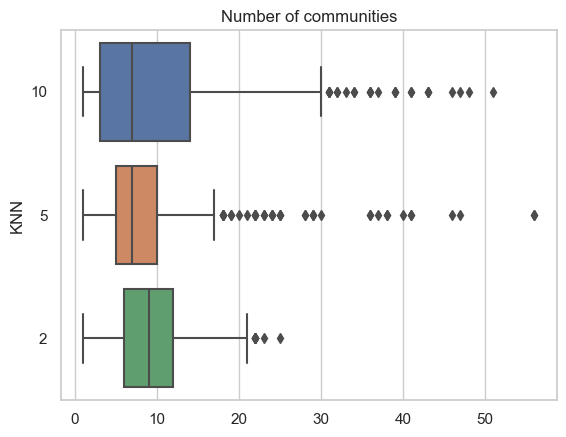

In [76]:
x = pd.DataFrame(communities)
ax = sb.boxplot(data=x, orient="h")
plt.title("Number of communities")
plt.ylabel("KNN")

Text(0, 0.5, 'KNN')

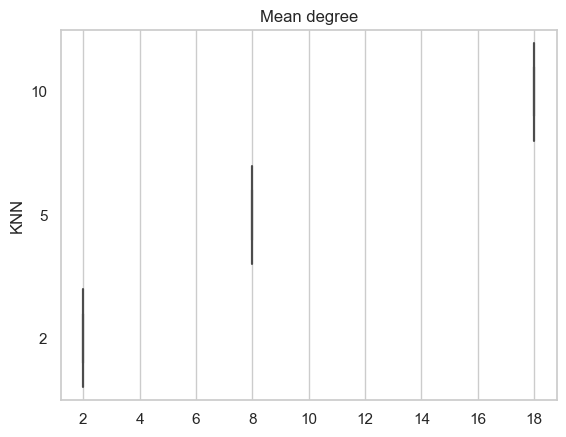

In [77]:
x = pd.DataFrame(mean_degree)
ax = sb.boxplot(data=x, orient="h")
plt.title("Mean degree")
plt.ylabel("KNN")

Text(0, 0.5, 'KNN')

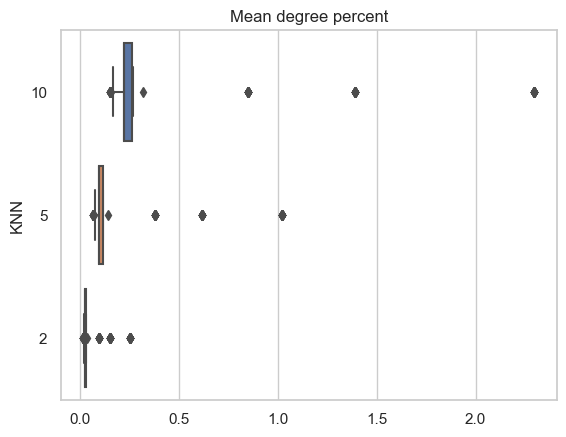

In [78]:
x = pd.DataFrame(mean_degree_percent)
ax = sb.boxplot(data=x, orient="h")
plt.title("Mean degree percent")
plt.ylabel("KNN")

Text(0, 0.5, 'KNN')

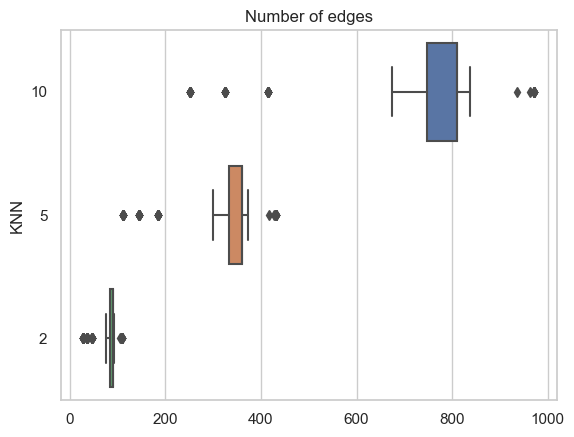

In [79]:
x = pd.DataFrame(num_edges)
ax = sb.boxplot(data=x, orient="h")
plt.title("Number of edges")
plt.ylabel("KNN")


Text(0, 0.5, 'KNN')

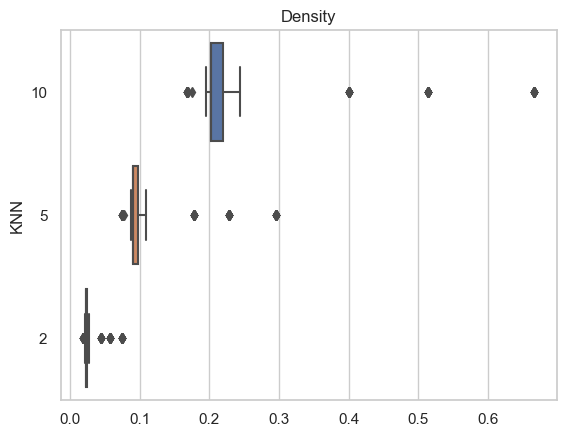

In [80]:
x = pd.DataFrame(density)
ax = sb.boxplot(data=x, orient="h")
plt.title("Density")
plt.ylabel("KNN")